<a href="https://colab.research.google.com/github/Ulugbek-glitch/AirlineChurn/blob/main/AirlineChurn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

Importing the TrainSet

In [ ]:
train_set=pd.read_csv('/content/train_dataset.csv')
train_set.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0


Gettin the info about the TrainSet

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
train_set.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


Showing the correlation with visualization

<ipython-input-63-2f82aea77db8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.to_frame()[0],y=corr.to_frame().index, palette='Blues_r')


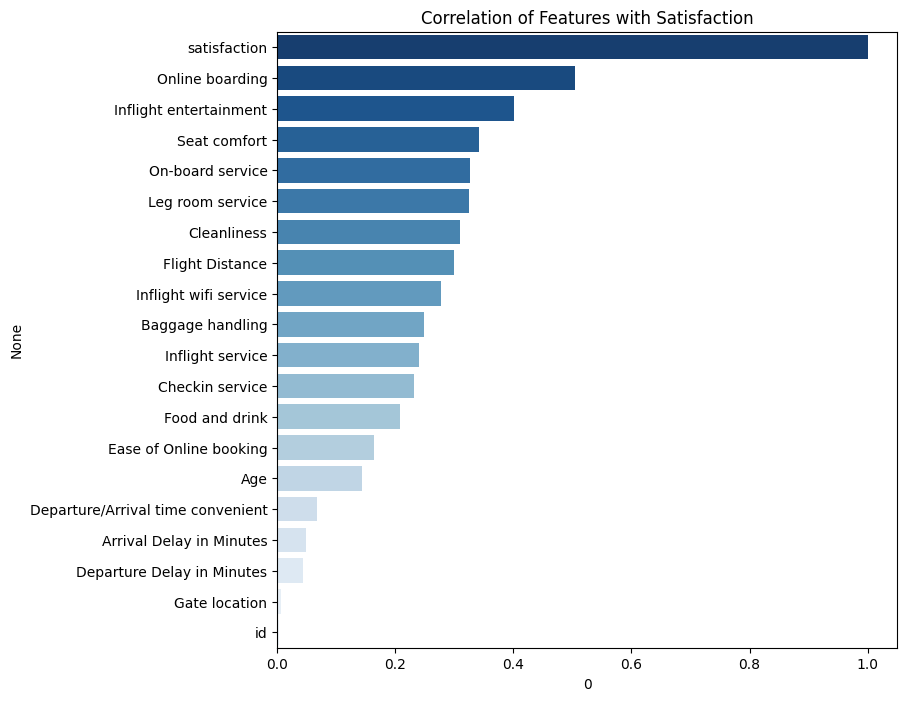

In [ ]:
corr = train_set.corrwith(train_set['satisfaction'], numeric_only=True).abs().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=corr.to_frame()[0],y=corr.to_frame().index, palette='Blues_r')
plt.title('Correlation of Features with Satisfaction')
plt.show()

Dropping some columns with lower correlation

In [ ]:
train_set.drop(['id','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1, inplace=True)
train_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,2,4,4,3,1,3,4,3,4,0
1,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,3,5,4,5,5,5,5,3,5,3,1
2,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,3,1,1,1,1,1,1,2,0
3,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,2,2,2,2,4,4,5,5,4,2,1
4,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,4,3,4,4,5,2,5,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,5,4,4,4,1,4,4,4,3,0
9996,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,2,3,3,4,4,4,4,1,4,4,0
9997,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,4,5,4,4,4,4,3,4,3,1
9998,Female,Loyal Customer,41,Business travel,Business,90,4,1,4,5,4,5,3,4,5,5,5,4,5,1


Splitting the TrainSet into X and y variables

In [ ]:
X=train_set.drop('satisfaction', axis=1)
y=train_set['satisfaction']

Writing a function to have a balanced data




In [ ]:
def data_prep(X):

  nums=['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
  cats=['Gender', 'Customer Type', 'Type of Travel', 'Class']

  num_pipeline=Pipeline([
    ('scaler', StandardScaler())
    ])

  full_pipeline=ColumnTransformer([
    ('num', num_pipeline, nums),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cats)
    ])
  train_set_pred=full_pipeline.fit_transform(X)

  return train_set_pred

Modifying the data with the function

In [ ]:
train_set_pred=data_prep(X)
train_set_pred

array([[-0.42793906, -0.64423433, -0.57254957, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.64608723,  0.19706293,  0.89514992, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.24332737, -0.35467155, -1.30639932, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.4447073 ,  0.2058672 ,  0.16130017, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10907408, -1.11477384,  0.89514992, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10907408,  0.50619075,  0.16130017, ...,  1.        ,
         0.        ,  0.        ]])

Importing the TestSet and filling missing values

In [ ]:
test_set=pd.read_csv('/content/test_dataset.csv')
test_set['Arrival Delay in Minutes'].fillna(test_set['Arrival Delay in Minutes'].mean(), inplace=True)


<ipython-input-80-71a8c70a6b91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['Arrival Delay in Minutes'].fillna(test_set['Arrival Delay in Minutes'].mean(), inplace=True)


Modifying the TestSet with the function

In [ ]:
test_set_pred=data_prep(test_set)
test_set_pred

array([[-1.00949875,  1.4675743 , -0.55639009, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61798677,  0.40000693, -1.28062061, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.75361056, -0.86902552,  0.89207093, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.1279441 , -0.60830601, -0.55639009, ...,  0.        ,
         1.        ,  0.        ],
       [-1.14512254, -0.23697823,  1.61630145, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00949875, -0.13032025,  0.16784042, ...,  0.        ,
         1.        ,  0.        ]])

ML Process with RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(train_set_pred, y)

RandomForestClassifier(random_state=42)

Predicting the module

In [ ]:
y_pred=forest_model.predict(test_set_pred)

Transferring the predicted samples into Samples dataset

In [ ]:
sample=pd.read_csv('/content/sample_submission.csv')
sample['satisfaction']=y_pred
sample

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1


Saving our ML Module

In [ ]:
sample.to_csv('AirlineChurnSubmission.csv', index=False)